In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
data_path = "SteamCharts.csv"

In [3]:
data = pd.read_csv(data_path, header=0)

print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
                               gamename  year      month        avg      gain  \
0      Counter-Strike: Global Offensive  2021  February   741013.24  -2196.42   
1      Counter-Strike: Global Offensive  2021   January   743209.66  25405.91   
2      Counter-Strike: Global Offensive  2020  December   717803.75  49049.17   
3      Counter-Strike: Global Offensive  2020  November   668754.58  55087.89   
4      Counter-Strike: Global Offensive  2020   October   613666.69   6816.37   
...                                 ...   ...        ...        ...       ...   
83784       Steel Division: Normandy 44  2017      July      421.60   -485.13   
83785       Steel Division: Normandy 44  2017      June      906.74   -231.92   
83786       Steel Division: Normandy 44  2017       May     1138.66    415.61   
83787       Steel Division: Normandy 44  2017     April      723.05    720.21   
83788       Steel Division: Normandy 44  2017     March        2.84    

In [4]:
print(data.shape)
print(data.info())

(83789, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           82529 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB
None


In [5]:
print(data.sort_values(by='avg', ascending=False).groupby("gamename").first().sort_values(by='avg', ascending=False).head(10))

data_biggest = pd.unique(data.sort_values(by='avg', ascending=False)['gamename'])

                                  year      month         avg       gain  \
gamename                                                                   
PLAYERUNKNOWN'S BATTLEGROUNDS     2018   January   1584886.77  148728.26   
Counter-Strike: Global Offensive  2020     April    857604.22  186570.94   
Dota 2                            2016  February    709178.26   97003.48   
Cyberpunk 2077                    2020  December    332395.65 -250248.99   
Fallout 4                         2015  November    226297.83 -132161.46   
Grand Theft Auto V                2015     April    192714.01   31424.28   
Monster Hunter: World             2018    August    188291.24   82737.26   
Destiny 2                         2019   October    165307.82  -57352.05   
Rust                              2021   January    142117.25   80945.60   
Terraria                          2020       May    129808.62   78493.53   

                                     peak avg_peak_perc  
gamename                     

In [18]:
top_games = data_biggest[:20]
print(top_games)

["PLAYERUNKNOWN'S BATTLEGROUNDS" 'Counter-Strike: Global Offensive'
 'Dota 2' 'Cyberpunk 2077' 'Fallout 4' 'Grand Theft Auto V'
 'Monster Hunter: World' 'Destiny 2' 'Rust' 'Terraria'
 'Fall Guys: Ultimate Knockout' 'Apex Legends'
 "Tom Clancy's Rainbow Six Siege" 'Mount & Blade II: Bannerlord'
 'Total War: THREE KINGDOMS' 'Team Fortress 2' 'ARK: Survival Evolved'
 'Z1 Battle Royale' "Sid Meier's Civilization VI" 'Football Manager 2020']


In [28]:
data_top = []
months = {
    'January ' : 1,
    'February ' : 2,
    'March ' : 3,
    'April ' : 4,
    'May ' : 5,
    'June ' : 6,
    'July ' : 7,
    'August ' : 8,
    'September ' : 9, 
    'October ' : 10,
    'November ' : 11,
    'December ' : 12
}

for name in top_games:
    data_game = data.loc[data["gamename"] == name].sort_values(by='year')
    data_game['month'] = data_game['month'].apply(lambda x: months[x])
    data_game = data_game.sort_values(['year', 'month'])
    
    if data_game.shape[0] > 70:
        data_top.append(data_game)

In [29]:
print(data_top[0].head())

                             gamename  year  month       avg      gain   peak  \
103  Counter-Strike: Global Offensive  2012      7    932.57       NaN   1642   
102  Counter-Strike: Global Offensive  2012      8  15475.39  14542.81  52261   
101  Counter-Strike: Global Offensive  2012      9  16000.75    525.36  36057   
100  Counter-Strike: Global Offensive  2012     10  10739.48  -5261.27  20850   
99   Counter-Strike: Global Offensive  2012     11  14134.10   3394.62  50533   

    avg_peak_perc  
103      56.7948%  
102      29.6117%  
101      44.3763%  
100      51.5083%  
99         27.97%  


In [30]:
def plotPresentData(df, name):
    df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)
    df.plot('date', 'avg')
    plt.title("Avg Players at the Same Time for " + name)

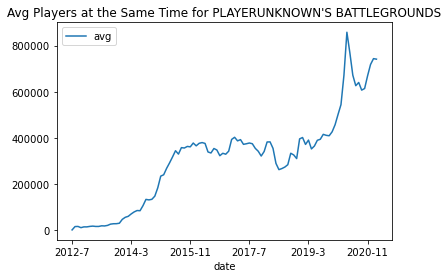

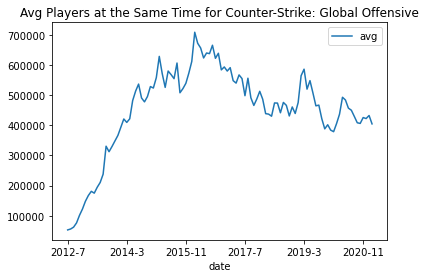

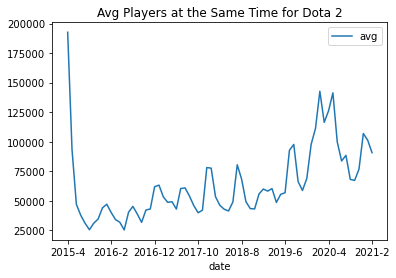

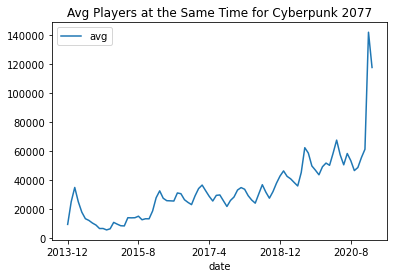

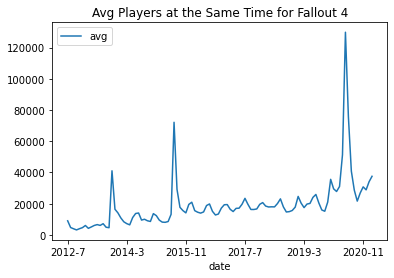

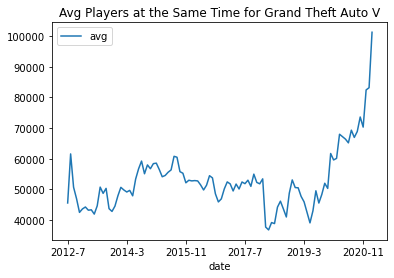

In [31]:
for i in range(0, len(data_top)):
    #print(df.info())
    plotPresentData(data_top[i], top_games[i])

In [33]:
for df in data_top:
    print(df.info())
    
print(len(data_top))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 103 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       104 non-null    object 
 1   year           104 non-null    int64  
 2   month          104 non-null    int64  
 3   avg            104 non-null    float64
 4   gain           103 non-null    float64
 5   peak           104 non-null    int64  
 6   avg_peak_perc  104 non-null    object 
 7   date           104 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 7.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 207 to 104
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       104 non-null    object 
 1   year           104 non-null    int64  
 2   month          104 non-null    int64  
 3   avg            104 non-null    float64
 4   gain          